# Загрузка данных
Первым делом мы решили подготовить всё, что нам может понадобится, и разобраться с набором данных:

In [1]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as p3
import numpy as np
import random
import time

from functools import partial
from ipywidgets import interact, RadioButtons, IntSlider, FloatSlider, Dropdown, BoundedFloatText
from numpy.linalg import norm

random.seed(42) # начальное состояние генератора случайных чисел, чтобы можно было воспроизводить результаты.

In [3]:
import pandas as pd

In [8]:
df = pd.read_csv("data.csv", header=None, delimiter=';')
df=df.drop([3,4], axis=1)

In [9]:
df.head()

,0,1,2
0,0.779427,0.257305,1.0
1,0.777005,0.015915,1.0
2,0.977092,0.304210,1.0
3,0.043032,0.140899,0.0
4,0.760433,0.193123,1.0


In [10]:
df[2][0]

1.0

In [7]:
type(df[2][0])

numpy.float64

In [27]:
data = df.values

In [29]:
type(data)

numpy.ndarray

In [33]:
pears = data[:, 2] == 1

In [34]:
apples = np.logical_not(pears)

In [39]:
data[0]==pears[0]

array([False, False,  True])

In [43]:
len(data)

1000

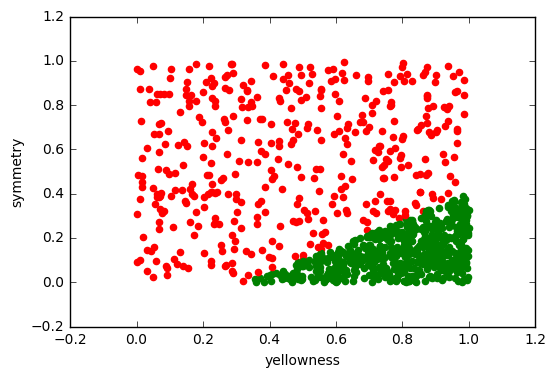

In [46]:
# груши зеленые , яблоки красные
for i in range (len(data)):
    if data[i][2]==1:
        plt.scatter((data[i][0]),(data[i][1]), color = "green")
    else:
        plt.scatter((data[i][0]),(data[i][1]), color = "red")
plt.xlabel("yellowness")
plt.ylabel("symmetry")
plt.show()

# код с курсов не раболчий
%matplotlib inline
data = np.loadtxt("data.csv", delimiter=",")
pears = data[:, 2] == 1
apples = np.logical_not(pears)
plt.scatter((data[0]==apples),(data[1]==apples), color = "red")
plt.scatter((data[0]==pears), (data[1]==pears), color = "green")
plt.xlabel("yellowness")
plt.ylabel("symmetry")
plt.show()

Данные - матрица 1000×3, в каждой строке указаны желтизна и симметричность очередного фрукта (в первой и второй колонках) и его сортовая принадлежность (третья колонка, 0 - яблоки, 1 - груши).

Задача действительно выглядела не очень сложно.

Когда данные были загружены, мы захотели впечатлить Зюка своими познаниями и сразу ринулись писать алгоритм обучения перцептрона, однако Зюк остановил нас, напомнив, что сперва нужно решить, какой вообще будет структура модуля, распознающего яблоки и груши. Мы призадумались, и он с ностальгической улыбкой показал нам одну из своих заготовок:

# Перцептрон

In [47]:
class Perceptron:

    def __init__(self, w, b):
        """
        Инициализируем наш объект - перцептрон.
        w - вектор весов размера (m, 1), где m - количество переменных
        b - число
        """
        
        self.w = w
        self.b = b

    def forward_pass(self, single_input):
        """
        Метод рассчитывает ответ перцептрона при предъявлении одного примера
        single_input - вектор примера размера (m, 1).
        Метод возвращает число (0 или 1) или boolean (True/False)
        """
        
        result = 0
        for i in range(0, len(self.w)):
            result += self.w[i] * single_input[i]
        result += self.b
        
        if result > 0:
            return 1
        else:
            return 0

    def vectorized_forward_pass(self, input_matrix):
        """
        Метод рассчитывает ответ перцептрона при предъявлении набора примеров
        input_matrix - матрица примеров размера (n, m), каждая строка - отдельный пример,
        n - количество примеров, m - количество переменных
        Возвращает вертикальный вектор размера (n, 1) с ответами перцептрона
        (элементы вектора - boolean или целые числа (0 или 1))
        """
        
        ## Этот метод необходимо реализовать
        pass
    
    def train_on_single_example(self, example, y):
        """
        принимает вектор активации входов example формы (m, 1) 
        и правильный ответ для него (число 0 или 1 или boolean),
        обновляет значения весов перцептрона в соответствии с этим примером
        и возвращает размер ошибки, которая случилась на этом примере до изменения весов (0 или 1)
        (на её основании мы потом построим интересный график)
        """

        ## Этот метод необходимо реализовать
        pass

Оказалось, что это был первый нейрон, который он запрограммировал сам. Он рассказал, что метод train_on_single_example остался без реализации, так как в то время веса ему еще готовила мама. Векторизовать он, как и все дети, не любил, поэтому данный метод тоже не готов.

Мы с лёгким нетерпением спросили, можно ли нам что-нибудь запрограммировать. Убедившись, что мы разобрались в приведённом коде, Зюк поставил задачу:

# Реализовать метод vectorized_forward_pass
Это метод, который считает значения активационной функции нейрона.

На вход он принимает матрицу активаций размера n×m и вектор ответов длины n. Каждая строка - отдельный пример. В случае с яблоками и грушами матрица будет размера n×2, где n - количество примеров, для которых мы хотим получить решения (но, конечно, когда мы будем проверять ваши решения, у данных может быть и другой размер!). vectorized_forward_pass отдаёт столбец (формы n×1) значений активационной функции нейрона для всех переданных ему входных данных. Зюк предупредил, что если мы будем использовать циклы (for, while) или операторы ветвления (if) - решение не пройдёт его внутреннюю проверку.

Было что-то занудное в его голосе, но что делать? Видимо, это та цена, которую нужно платить, если хочешь, чтобы тебя поняли.

/// Чтобы всё работало - впишите свою реализацию в предоставленный выше шаблон и сдайте функцию на сайте курса, чтобы 
/// проверить, что решение правильное. Имейте в виду: наши тесты не охватывают всех возможных характеристик, 
/// поэтому постарайтесь делать качественно, иначе незамеченные ошибки могут накапливаться. 
/// Не забудьте запустить код в ячейке, иначе Python будет помнить старую версию того, что было написано


# Нужно реализовать активационную функцию перцептрона в матричном виде. Т.е. перемножить матрицу весов и матрицу значений (input) и сравнить с отрицательным смещением (ну или добавить его).

bias  находится в self.b, а матрица весов self.w